# Argosim tutorial - Part 3

In this tutorial we will explore the `imaging_utils` module. This module provides functions to simulate radio images.

In [1]:
# Import the imaging module
from argosim.imaging_utils import *

## Sky and UV spaces


What is the link between the sky space and the uv space?

...

Which functions of the `imaging_utils` module are used to convert between the sky and uv spaces? How do the work internally?

...

### Loading a sky image
We will use `PIL.Image` to load the `png` images and `numpy` to convert the image to a numpy array. 

P.S. The `PIL` library is not installed in the Argosim environment. You can install it by running the following command:
```bash
!pip install pillow
```

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # you may need to install this library with `pip install pillow`.

In [7]:
# Load the Cygnus A image
sky_model_path = '../data/sky_models/cygnus_a.png'
sky_png = Image.open(sky_model_path)

# Convert the image to a numpy array
sky = np.array(sky_png)

# Check the array shape
print(sky.shape)

(541, 541, 2)


Does it have the shape we expect?

...

What do you have to say about the size of the image? (Hint: remember what the functions sky2uv and uv2sky do.)

...

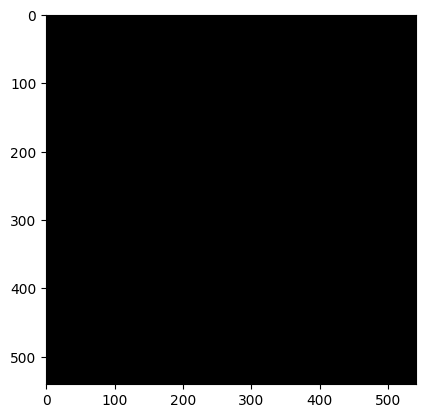

In [10]:
# There is nothing on the second channel.
plt.imshow(sky[:, :, 1], cmap='gray')

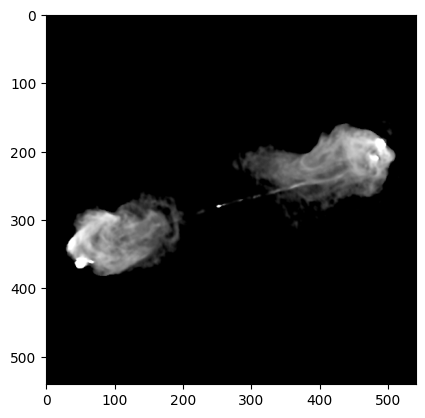

In [11]:
# Argosim works with 2D images, with just one channel. Get rid of the unnecessary dimensions.
sky = sky[:, :, 0]  # keep only the first channel
# Plot the image using matplotlib
plt.imshow(sky, cmap='gray')

### UV space

In [12]:
# Convert the sky model to uv space and analyze the result
sky_uv = sky2uv(sky)

What is the size of the output array? Which type of data does it contain?
...

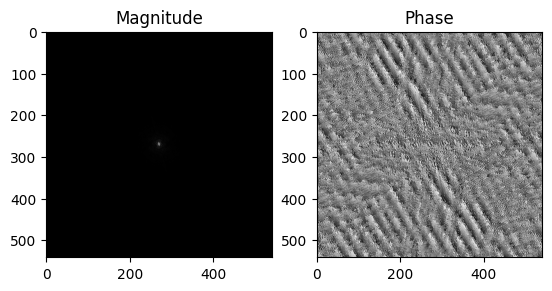

In [14]:
# Plot the sky model in uv space
plt.subplot(1, 2, 1)
plt.imshow(np.abs(sky_uv), cmap='gray')
plt.title('Magnitude')
plt.subplot(1, 2, 2)
plt.imshow(np.angle(sky_uv), cmap='gray')
plt.title('Phase')
plt.show()

### Repeat for the other sky models

In [15]:
# Import sky model
...
# If necessary, convert the sky model to a 2D numpy array
...
# Plot the sky model
...
# Convert to uv space
...
# Plot the sky model in uv space
...

# repeat the process for the other sky models

## Imaging


Recall the imaging process. What are the steps involved? How do we simulate the observed sky model given the uv coverage (uv sampling points)?

...

In [16]:
from argosim.antenna_utils import *

In [23]:
# Load the data
dataset = np.load('../data/sky_models/galsim_sky.npy', allow_pickle=True)[()]

# Check the content of the dataset dictionary (dataset.keys())
dataset.keys()

dict_keys(['image', 'gal_pos', 'star_pos', 'g1', 'g2', 'star_g1', 'star_g2', 'star_flux', 'n_galaxies', 'n_stars', 'field_area_arcmin2'])

In [24]:
# Get the sky model image and the asociated field of view size
sky = dataset['image']
fov_size = np.sqrt(dataset['field_area_arcmin2'])/60.0

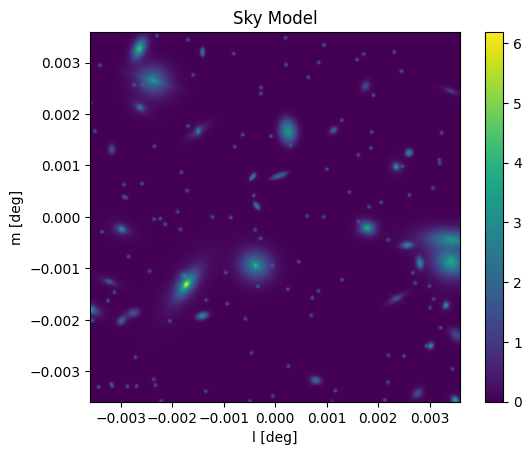

In [26]:
from argosim import plot_utils
plot_utils.plot_sky(sky, (fov_size, fov_size), title='Sky Model')

In [27]:
# Set up the antenna array, compute the baselines and the uv tracks
antena = y_antenna_arr(n_antenna=30, r=10e3)
baselines = get_baselines(antena)
track, _ = uv_track_multiband(baselines)

# Perform the observation
obs, dirty_beam = simulate_dirty_observation(sky, track, fov_size)

/Users/ec270266/Documents/Phd/Argos/repos/argosim/src/argosim/imaging_utils.py:122: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in zeros is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  uv_mask = jnp.zeros(sky_uv_shape, dtype=jnp.complex128)


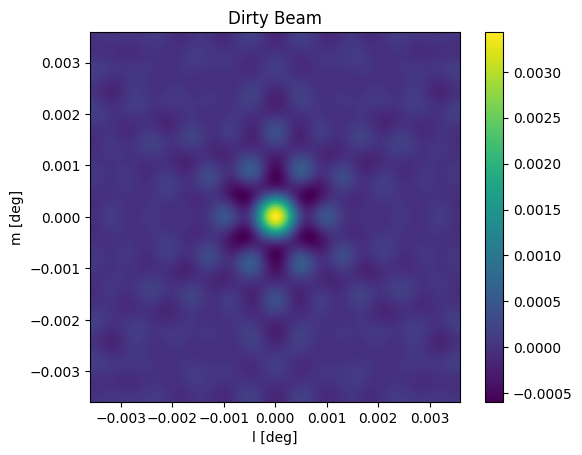

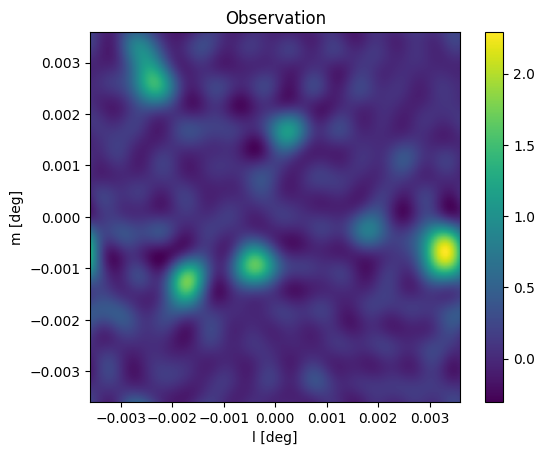

In [28]:
# Plot the dirty beam
plot_utils.plot_sky(dirty_beam, (fov_size, fov_size), title='Dirty Beam')

# Plot the observation
plot_utils.plot_sky(obs, (fov_size, fov_size), title='Observation')

Check the source code of the function `simulate_dirty_observation`. What does it do? And which other functions from the `imaging_utils` module does it use?

...

In the source code, what does `vis` stand for? Explain...

...